In [85]:
import os
os.getcwd()

'/Users/yangxiang/A List/Uchicago/2020_Spring/NLP/Week_3/Homework'

In [86]:
from __future__ import division
import nltk
import string
import os
from nltk.corpus import stopwords
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

In [87]:
def ngram_compare_files(file1,file2,n):
    # Takes two files
    # hashes their n-grams into twos lists
    # calculates the intersection and union
    # of the two lists, and returns
    # Jacard similarity value
 
    stop = stopwords.words('english')
    f1 = open(file1)
    raw = f1.read()
    f1.close()
    f1_grams = nltk.ngrams(raw.split(),n)
    
    array_1 = []
    
    for gram in f1_grams:
        array_1.append(hash(gram))
    f2 = open(file2)
    raw = f2.read()
    f2.close()
    f2_grams = nltk.ngrams(raw.split(),n)
    
    array_2 = []
    
    for gram in f2_grams:
        array_2.append(hash(gram))
        
    intersection = len(list(set(array_1).intersection(array_2)))    
    union = len(set(array_1)) + len(set(array_2)) - intersection
    jacard_similarity = intersection / union
    return jacard_similarity


def pairs_of_files(directory):
    # returns combination of two files given
    # all files in a directory
    
    dir = os.listdir(directory)
    combo = combinations(dir, 2)
    return combo

def compare_files(directory,ngram_size,threshold):
    # compares all pairs of files in a directory
    # for similarity.
    # RETURNS: Dictionary, with key as
    # comma-separated string of two files
    # and value of similarity index as decimal
    # where similarity index is above threshold
    # value.
    
    compare_dictionary = {}
    
    ngram = ngram_size
    combo = pairs_of_files(directory)
    
    for i in combo:
        
        sim = ngram_compare_files(directory+'/'+str(i[0]),directory+'/'+str(i[1]),ngram)
        if sim > threshold:
            
            key = str(i[0]) + "," + str(i[1])
            value = sim
            compare_dictionary[key]=value
            
    return compare_dictionary   

### Determine which articles are similar to each other 

In [88]:
# Choose the best N for Ngram
dir = '/Users/yangxiang/A List/Uchicago/2020_Spring/NLP/Week_3/Homework'

In [94]:
x = []
y = []
yall = []

for n in range(2,20):
    
    art_comparison = compare_files(dir+'/Assignment 3 Articles',ngram_size=n,threshold=-1)
    a = np.zeros(len(art_comparison))
    counter = 0
    for key, value in art_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

Notes to myself:threshold 筛选相似度的区分线

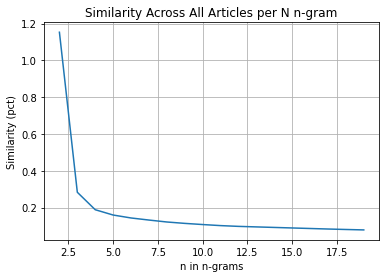

In [95]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Articles per N n-gram')
plt.grid()
plt.show()

#I choose n=3

Notes to myself: Similarity (pct) 纵坐标是相似度的百分比 取所有数的平均

###### Articles measuring similarity

In [96]:
articles_comparison = compare_files(dir+'/Assignment 3 Articles',ngram_size=3,threshold=0.1)


for k,v in articles_comparison.items():
    art1, art2 = k.split(',')
    similarity_index = v
    print (str(art1) + " is similar to " + str(art2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

article10.txt is similar to article13.txt with a Similarity Index of 21.798%


article17.txt is similar to article16.txt with a Similarity Index of 72.589%


article4.txt is similar to article3.txt with a Similarity Index of 13.592%




### Questions Answer (Articles part) :


###### Which articles / books were similar and which ones were dissimilar?
Similar:
article17.txt is similar to article16.txt with a Similarity Index of 72.589% when n=3
article10.txt is similar to article13.txt with a Similarity Index of 21.798% when n=3
article4.txt is similar to article3.txt with a Similarity Index of 13.592% when n=3

Most Dismilar:
Majority of the books are disimilar to each other with a similarity Index of 0.000% when n=3, for example:
article8.txt is similar to article40.txt with a Similarity Index of 0.000%
article8.txt is similar to article9.txt with a Similarity Index of 0.000%
article40.txt is similar to article36.txt with a Similarity Index of 0.000%

###### A brief write-up explaining why and how you chose “n” for you analysis (for n-grams)
By looking at the similarity plot, I saw a turning point show when n is around 3, which means similarity drop slows down when n=3;  also, for articles, especially short articles, big n usually lead to extremely small similarity. Thus, I think n=3 should be reasonable for my analysis.

###### Was the “n” identical or different for books vs. articles and why
Like I saw for the last question, 'n' for books ane articles should be different. For articles, the wrord count is relatively small, so a small 'n' will lead so a extremely small similarity, but for a book, a small n will only lead to picking up word terms that are not meaning for even they have a high similarity.Bigger n usually give more insights for the books and give better results.

###### Visualize the selection of “n”
Please refer to plot 'Similarity Across All Articles per N n-gram'

### Determine which articles are similar to each other 

In [97]:
# Choose the best N for Ngram
x = []
y = []
yall = []

for n in range(2,20):
        
    books_comparison = compare_files(dir+'/Assignment 3 Books',ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)


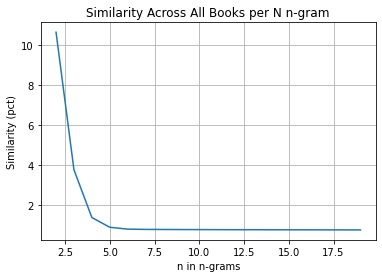

In [98]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()
plt.show()

#I choose n=4

###### Books measuring similarity

In [105]:
books_comparison = compare_files(dir+'/Assignment 3 Books',ngram_size=4,threshold=-1)


for k,v in books_comparison.items():
    book1, book2 = k.split(',')
    similarity_index = v
    print ("1")
    print (str(book1) + " is similar to " + str(book2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

1
Adventures_of_Sherlock_Holmes.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 2.332%


1
Adventures_of_Sherlock_Holmes.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 2.444%


1
Adventures_of_Sherlock_Holmes.txt is similar to 3boat10.txt with a Similarity Index of 0.397%


1
Return_of_Sherlock_Holmes.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 2.430%


1
Return_of_Sherlock_Holmes.txt is similar to 3boat10.txt with a Similarity Index of 0.356%


1
Hound_of_the_Baskervilles.txt is similar to 3boat10.txt with a Similarity Index of 0.292%




### Questions Answer(Books part) :
###### Which articles / books were similar and which ones were dissimilar?
Similar:
Adventures_of_Sherlock_Holmes.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 2.444% when n=4
Return_of_Sherlock_Holmes.txt is similar to Hound_of_the_Baskervilles.txt with a Similarity Index of 2.430% when n=4
Adventures_of_Sherlock_Holmes.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 2.332% when n=4

Most Dismilar:
Hound_of_the_Baskervilles.txt is similar to 3boat10.txt with a Similarity Index of 0.292% when n=4
Return_of_Sherlock_Holmes.txt is similar to 3boat10.txt with a Similarity Index of 0.356% when n=4
Adventures_of_Sherlock_Holmes.txt is similar to 3boat10.txt with a Similarity Index of 0.397% when n=4


###### A brief write-up explaining why and how you chose “n” for you analysis (for n-grams)
By looking at the similarity plot, I saw a turning point show when n is around 4, which means similarity drop slows down when n is around 4;  also, for books, it is good to have a bigger 'n' than the 'n' for article analysis purpose. Bigger n usually give more insights for the books and give better results. Thus, I think n=4 should be reasonable for my analysis.

###### Was the “n” identical or different for books vs. articles and why
Like I saw for the last question, 'n' for books ane articles should be different. For articles, the wrord count is relatively small, so a small 'n' will lead so a extremely small similarity, but for a book, a small n will only lead to picking up word terms that are not meaning for even they have a high similarity. Bigger n usually give more insights for the books and give better results.
###### Visualize the selection of “n”
Please refer to plot 'Similarity Across All Books per N n-gram'